**TP ACP**

**Objectifs du TP :**

1- Analyser le World Happiness Report à l'aide de PCA.

2- Réduire la dimensionnalité du dataset tout en préservant l'information la plus significative.

2- Visualiser les données après réduction de la dimension.



**Importation des bibliothèques**

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

**Chargement et exploration des données**

In [29]:
data = pd.read_csv('World Happiness Report data.csv')

# Aperçu des données
print(data.head())
print(data.info())

   Overall rank      Country  Score  GDP per capita  Social support  \
0             1      Finland  7.769           1.340           1.587   
1             2      Denmark  7.600           1.383           1.573   
2             3       Norway  7.554           1.488           1.582   
3             4      Iceland  7.494           1.380           1.624   
4             5  Netherlands  7.488           1.396           1.522   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
0                    0.986                         0.596       0.153   
1                    0.996                         0.592       0.252   
2                    1.028                         0.603       0.271   
3                    1.026                         0.591       0.354   
4                    0.999                         0.557       0.322   

   Perceptions of corruption  
0                      0.393  
1                      0.410  
2                      0.341  
3               

**Prétraitement des données**

In [30]:

# Suppression des colonnes non numériques (nom des pays)
data_numeric = data.select_dtypes(include=[np.number])

# Gestion des valeurs manquantes
data_numeric = data_numeric.dropna()

# Normalisation des données
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_numeric)

**Application de l'ACP**

In [31]:
# Initialisation et application de l'ACP
pca = PCA()
pca_components = pca.fit_transform(data_scaled)

**Variance expliquée**


In [32]:
# Calcul des valeurs propres (variance expliquée)
explained_variance = pca.explained_variance_ratio_

# Affichage des variances expliquée
print("Variance expliquée par chaque composante :", explained_variance)

Variance expliquée par chaque composante : [0.58605806 0.17890682 0.07709477 0.06953863 0.03486571 0.03270265
 0.01963969 0.00119367]


**Bien évidemment, il est possiblede faire un tableau récapitulatif, avec les variances expliquées, les proportions de variance expliquée simples et cumulées.**

In [33]:

eig = pd.DataFrame({
    "Dimension": ["Dim" + str(x + 1) for x in range(len(pca.explained_variance_))],
    "Variance expliquée": pca.explained_variance_,
    "% variance expliquée": np.round(pca.explained_variance_ratio_ * 100, 2),
    "% cum. var. expliquée": np.round(np.cumsum(pca.explained_variance_ratio_) * 100, 2)
})

# Affichage du tableau
print(eig)

  Dimension  Variance expliquée  % variance expliquée  % cum. var. expliquée
0      Dim1            4.718713                 58.61                  58.61
1      Dim2            1.440488                 17.89                  76.50
2      Dim3            0.620737                  7.71                  84.21
3      Dim4            0.559898                  6.95                  91.16
4      Dim5            0.280725                  3.49                  94.65
5      Dim6            0.263309                  3.27                  97.92
6      Dim7            0.158131                  1.96                  99.88
7      Dim8            0.009611                  0.12                 100.00


**Critère de Kaiser**

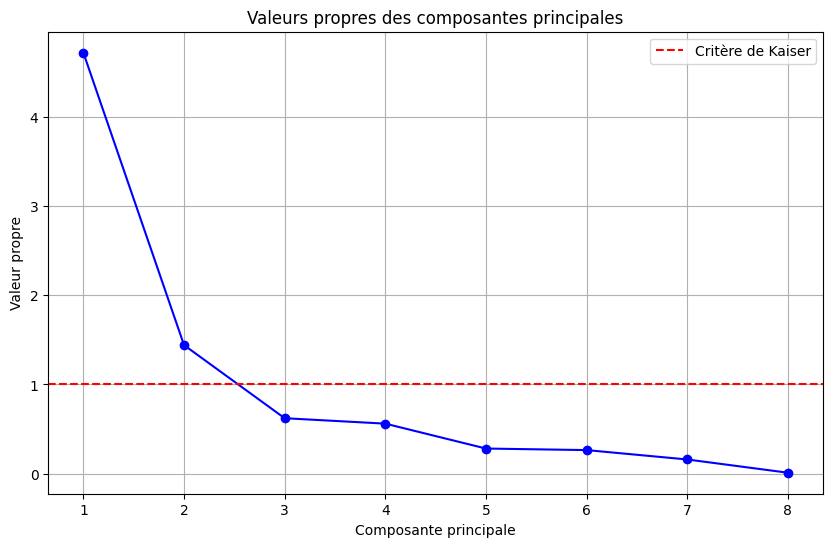

In [34]:
# Valeurs propres (variance expliquée par chaque composante)
eigenvalues = pca.explained_variance_

# Trace du scree plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(eigenvalues) + 1), eigenvalues, marker='o', color='b')
plt.axhline(y=1, color='r', linestyle='--', label='Critère de Kaiser')
plt.title("Valeurs propres des composantes principales")
plt.xlabel("Composante principale")
plt.ylabel("Valeur propre")
plt.legend()
plt.grid(True)
plt.show()

**Visualisation des contributions des variables aux composantes principales**

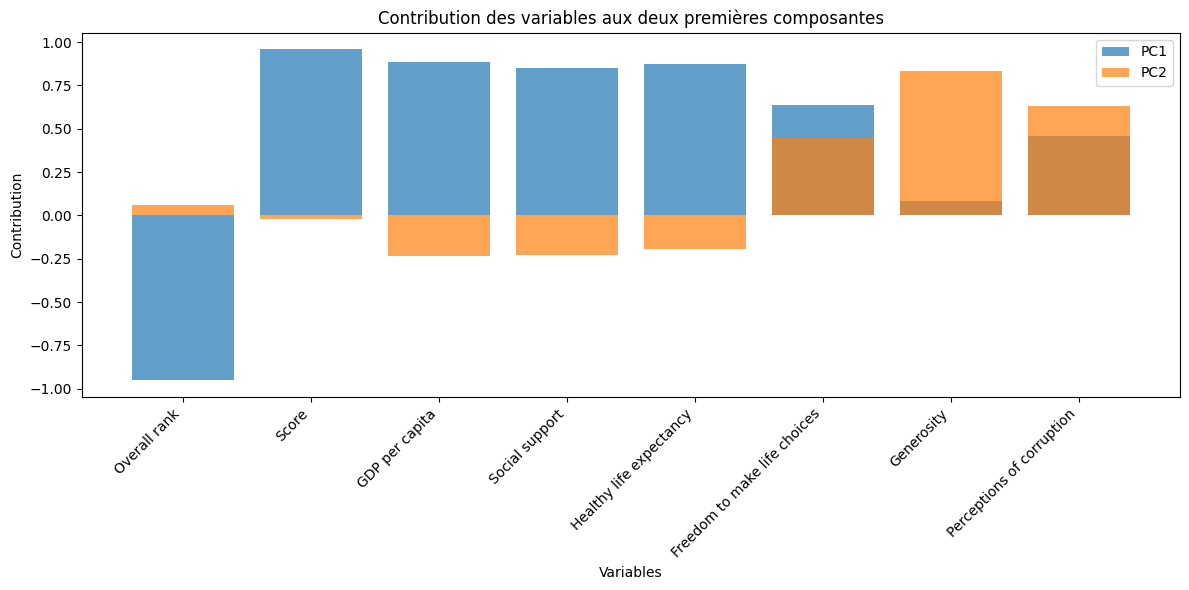

In [35]:
# Calcul des contributions des variables aux composantes principales
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

# Récupérer les noms des variables
variable_names = data_numeric.columns

# Création du graphique
plt.figure(figsize=(12, 6))

# Affichage des contributions pour les deux premières composantes principales
plt.bar(variable_names, loadings[:, 0], alpha=0.7, label='PC1')
plt.bar(variable_names, loadings[:, 1], alpha=0.7, label='PC2')

# Paramétrage des axes et du titre
plt.xlabel('Variables')
plt.ylabel('Contribution')
plt.title('Contribution des variables aux deux premières composantes')
plt.xticks(rotation=45, ha='right')  # Rotation des noms des variables pour une meilleure lisibilité
plt.legend()
plt.tight_layout()  # Ajustement de la mise en page pour éviter le chevauchement
plt.show()


**Projection des données sur les deux premières composantes principales**

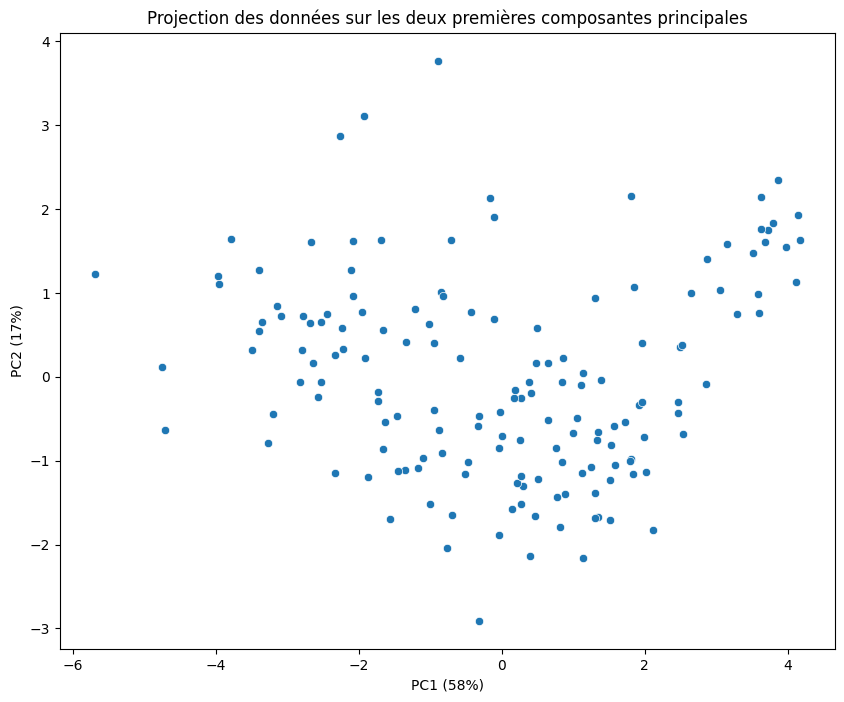

In [36]:
# Création d'un DataFrame pour les deux premières composantes principales
pca_df = pd.DataFrame(pca_components[:, :2], columns=['PC1', 'PC2'])

# Visualisation de la projection
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', data=pca_df)
plt.title('Projection des données sur les deux premières composantes principales')
plt.xlabel('PC1 (58%)')
plt.ylabel('PC2 (17%)')
plt.show()

**Carte des individus: Visualisation des individus avec le nom des pays**

Colonnes dans les données : Index(['Overall rank', 'Country', 'Score', 'GDP per capita', 'Social support',
       'Healthy life expectancy', 'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'],
      dtype='object')


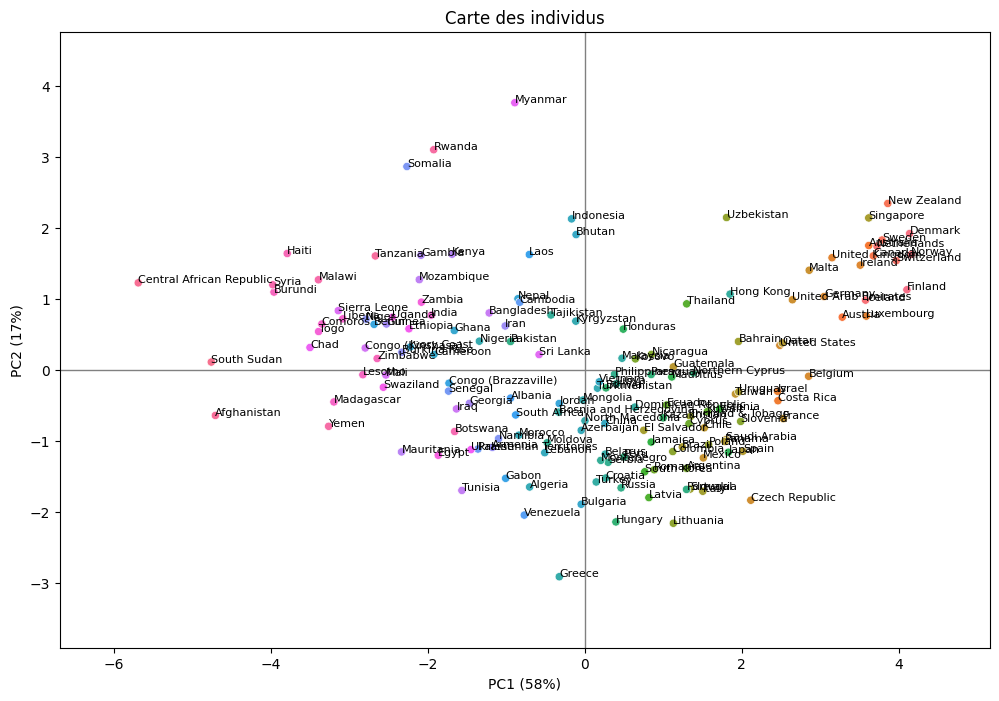

In [37]:
# Vérification des colonnes dans le DataFrame 'data'
print("Colonnes dans les données :", data.columns)

# Ajout de la colonne 'Country' pour identifier les points
if 'Country' in data.columns:
    pca_df['Country'] = data['Country']

# Visualisation
plt.figure(figsize=(12, 8))
sns.scatterplot(x='PC1', y='PC2', data=pca_df, hue='Country', legend=None)

# Réglage des axes pour les mettre au centre
plt.axhline(0, color='grey',linewidth=1)  # Ligne horizontale (axe y)
plt.axvline(0, color='grey',linewidth=1)  # Ligne verticale (axe x)

# Limites des axes
plt.xlim(pca_df['PC1'].min() - 1, pca_df['PC1'].max() + 1)
plt.ylim(pca_df['PC2'].min() - 1, pca_df['PC2'].max() + 1)

# Etiquettes et titre
plt.xlabel('PC1 (58%)')
plt.ylabel('PC2 (17%)')
plt.title("Carte des individus")

# Affichage du nom de chaque pays sur le graphique
for i in range(pca_df.shape[0]):
    plt.text(x=pca_df['PC1'][i], y=pca_df['PC2'][i], s=pca_df['Country'][i],
            fontdict=dict(color='black', size=8))

plt.show()


**Cercle de corrélation**

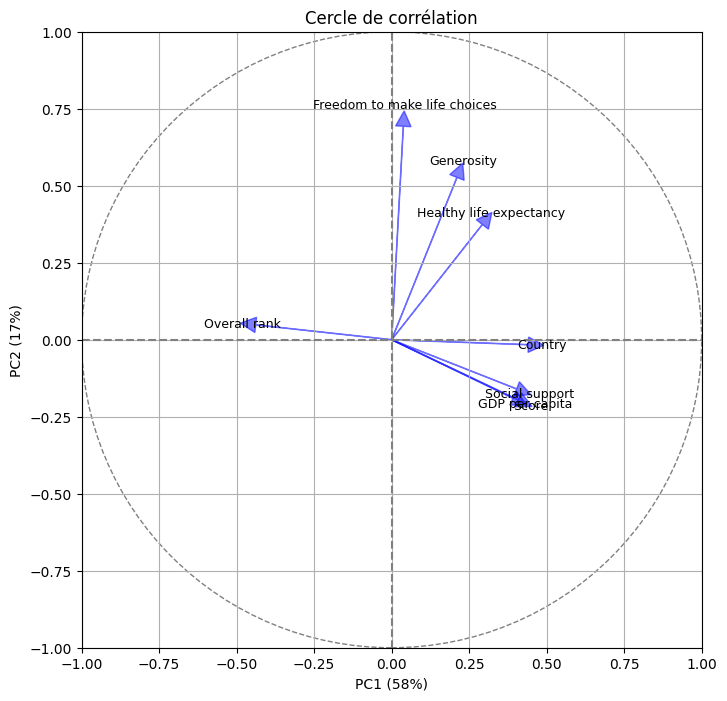

In [38]:

# Calcul de la matrice de corrélation entre les variables et les composantes principales
# Assurez-vous que 'pca' est l'objet PCA que vous avez déjà ajusté aux données d'origine
pcs = pca.components_

# Nombre de variables
n_vars = pcs.shape[1]
# Coordonnées des variables dans le plan formé par PC1 et PC2
x_vector = pcs[0, :]
y_vector = pcs[1, :]

# Cercle de corrélation
plt.figure(figsize=(8, 8))
plt.Circle((0, 0), 1, color='gray', fill=False)
plt.axhline(0, color='grey', linestyle='--')
plt.axvline(0, color='grey', linestyle='--')

# Tracé des flèches pour chaque variable et affichage du nom de chaque variable
for i in range(n_vars):
    plt.arrow(0, 0, x_vector[i], y_vector[i], color='b', alpha=0.5,
              head_width=0.05, head_length=0.05)
    plt.text(x_vector[i] * 1.1, y_vector[i] * 1.1, data.columns[i], color='black',
             ha='center', va='center', fontsize=9)

# Paramètres du cercle de corrélation
plt.gca().add_artist(plt.Circle((0, 0), 1, color='gray', fill=False, linestyle='--'))
plt.xlabel('PC1 (58%)')
plt.ylabel('PC2 (17%)')
plt.title("Cercle de corrélation")
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.grid()

plt.show()


**Superposer les individus et les variable sur le plan factoriel**

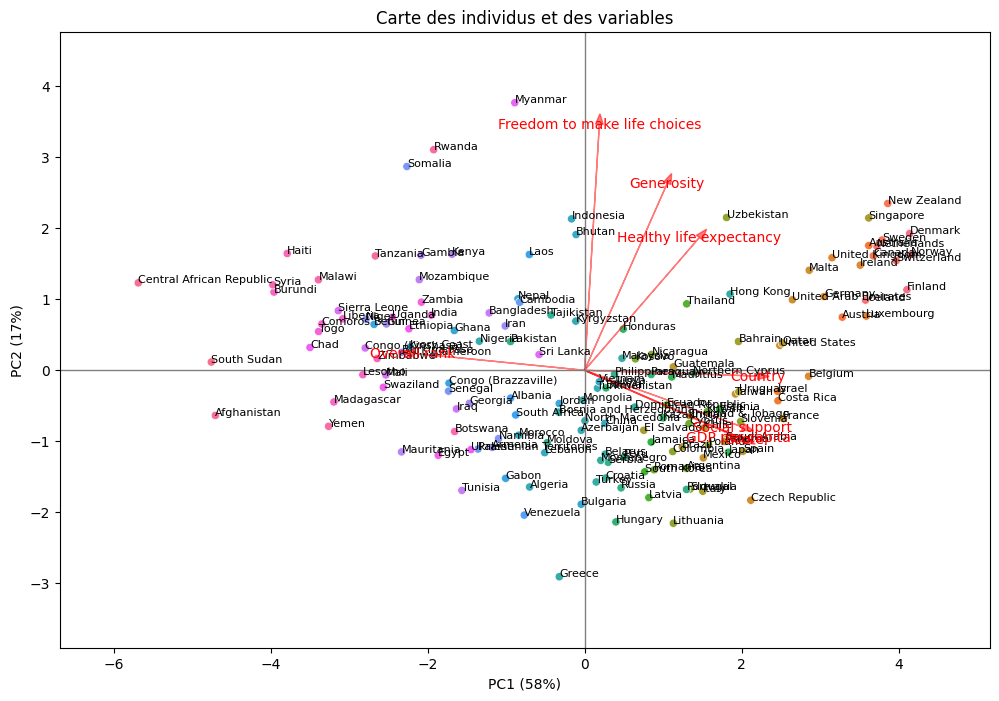

In [39]:

# Affichage des individus et des vecteurs des variables (biplot)
plt.figure(figsize=(12, 8))

# Affichage des individus
sns.scatterplot(x='PC1', y='PC2', data=pca_df, hue='Country', legend=None)

# Réglage des axes pour les mettre au centre
plt.axhline(0, color='grey', linewidth=1)  # Axe horizontal
plt.axvline(0, color='grey', linewidth=1)  # Axe vertical

# Limites des axes
plt.xlim(pca_df['PC1'].min() - 1, pca_df['PC1'].max() + 1)
plt.ylim(pca_df['PC2'].min() - 1, pca_df['PC2'].max() + 1)

# Etiquettes et titre
plt.xlabel('PC1 (58%)')
plt.ylabel('PC2 (17%)')
plt.title("Carte des individus et des variables")

# Ajout des noms de chaque pays sur le graphique
for i in range(pca_df.shape[0]):
    plt.text(x=pca_df['PC1'][i], y=pca_df['PC2'][i], s=pca_df['Country'][i],
             fontdict=dict(color='black', size=8))

# Calcul des vecteurs des variables
for i, var in enumerate(pca.components_.T):  # 'pca' est l'objet PCA utilisé pour l'analyse
    plt.arrow(0, 0, var[0]*5, var[1]*5, color='red', alpha=0.5, head_width=0.1)  # '5' ajuste l'échelle des vecteurs
    plt.text(var[0]*5, var[1]*5, data.columns[i], color='red', ha='center', va='center')

plt.show()
